In [93]:
import sys
sys.path

['C:\\Users\\dkssu\\FG_Vision',
 'C:\\Users\\dkssu\\anaconda3\\python38.zip',
 'C:\\Users\\dkssu\\anaconda3\\DLLs',
 'C:\\Users\\dkssu\\anaconda3\\lib',
 'C:\\Users\\dkssu\\anaconda3',
 '',
 'C:\\Users\\dkssu\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\dkssu\\anaconda3\\lib\\site-packages',
 'C:\\Users\\dkssu\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\Users\\dkssu\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\dkssu\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\dkssu\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\dkssu\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\dkssu\\.ipython']

In [237]:
domain = []

In [2]:
import matplotlib.pyplot as plt

사각형의 시작 좌표는 x : 1423 y : 1530
사각형의 좌표는 (1423, 1530), (1458, 1595)
[{'label': '출입국 사실증명 종류 수량', 'w': 37, 'h': 55, 'cx': 1044, 'cy': 1111}, {'label': '외국인등록 사실증명 종류 수량', 'w': 27, 'h': 60, 'cx': 992, 'cy': 1169}, {'label': '외국인등록 열람 수', 'w': 35, 'h': 50, 'cx': 919, 'cy': 1224}, {'label': '출입국 사실증명 영문성명 병기신청', 'w': 35, 'h': 80, 'cx': 1420, 'cy': 1299}, {'label': '외국인등록 사실증명 과거등록번호 포함여부', 'w': 37, 'h': 60, 'cx': 1421, 'cy': 1445}, {'label': '외국인등록 사실증명 과거체류지 변동사항 포함여부', 'w': 35, 'h': 65, 'cx': 1440, 'cy': 1562}]


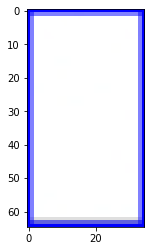

In [244]:
import cv2 
import numpy as np 

class MouseGesture():
    def __init__(self) -> None:
        self.is_dragging = False 
        # 마우스 위치 값 임시 저장을 위한 변수 
        self.x0, self.y0, self.w0, self.h0 = -1,-1,-1,-1

    def on_mouse(self, event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.x0 = x
            self.y0 = y
            self.is_dragging = True
            print("사각형의 시작 좌표는 x : {} y : {}".format(x,y) )
        elif event == cv2.EVENT_LBUTTONUP:
            self.is_dragging = False
            cv2.rectangle(param['image'], (self.x0, self.y0), (x,y),(0,0,255),2)            
            cv2.imshow(param['window_name'], param['image'])
            print("사각형의 좌표는 ({}, {}), ({}, {})".format(self.x0,self.y0,x,y) )
            img_cropped = cv2.getRectSubPix(
                image,
                patchSize=(x - self.x0, y - self.y0),
                center=(((self.x0 + x) / 2), ((self.y0 + y) / 2)),
            )
            plt.imshow(img_cropped)
            domain.append({
                'label': '외국인등록 사실증명 과거체류지 변동사항 포함여부',
                'w': int(x - self.x0),
                'h': int(y - self.y0),
                'cx': int((self.x0 + x) / 2),
                'cy': int((self.y0 + y) / 2),
            })
            print(domain)
        elif event == cv2.EVENT_MOUSEMOVE:
            if self.is_dragging:
                temp_img = param['image'].copy()
                cv2.rectangle(temp_img, (self.x0, self.y0), (x,y),(0,0,255),4)            
                cv2.imshow(param['window_name'], temp_img)
        return 


image = cv2.imread('11-1.jpg')
image = cv2.resize(image, (2480, 3508))
window_name = 'mouse_callback'
mouse_class = MouseGesture()
param = {
    "image" : image,
    "window_name" : window_name
}

cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.imshow(window_name, image)
cv2.resizeWindow(window_name, 1000, 1500)
cv2.setMouseCallback(window_name, mouse_class.on_mouse, param=param)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [216]:
domain.pop(-1)

{'label': '과거주소 변동사항 직접입력', 'w': 102, 'h': 71, 'cx': 2109, 'cy': 1620}

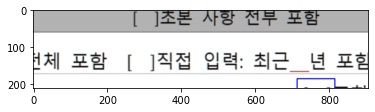

In [160]:
i = 2
img_cropped = cv2.getRectSubPix(
                image,
                patchSize=(domain[i]['w'], domain[i]['h']),
                center=(domain[i]['cx'], domain[i]['cy']),
            )
plt.imshow(img_cropped)

In [59]:
len(domain)

2

In [245]:
domain

[{'label': '출입국 사실증명 종류 수량', 'w': 37, 'h': 55, 'cx': 1044, 'cy': 1111},
 {'label': '외국인등록 사실증명 종류 수량', 'w': 27, 'h': 60, 'cx': 992, 'cy': 1169},
 {'label': '외국인등록 열람 수', 'w': 35, 'h': 50, 'cx': 919, 'cy': 1224},
 {'label': '출입국 사실증명 영문성명 병기신청', 'w': 35, 'h': 80, 'cx': 1420, 'cy': 1299},
 {'label': '외국인등록 사실증명 과거등록번호 포함여부', 'w': 37, 'h': 60, 'cx': 1421, 'cy': 1445},
 {'label': '외국인등록 사실증명 과거체류지 변동사항 포함여부',
  'w': 35,
  'h': 65,
  'cx': 1440,
  'cy': 1562}]